In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
!pip install -q kaggle

!mkdir ~/.kaggle
!cp "/content/drive/MyDrive/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download "stefanoleone992/fifa-23-complete-player-dataset"

!unzip -q fifa-23-complete-player-dataset.zip -d "fifa23"

!mv ./fifa23/male_players.csv ./
!mv "/content/fifa23/male_players (legacy).csv" ./

!rm -rf fifa23
!rm ./fifa-23-complete-player-dataset.zip


mkdir: cannot create directory ‘/root/.kaggle’: File exists
 99% 1.57G/1.58G [00:19<00:00, 32.2MB/s]
100% 1.58G/1.58G [00:19<00:00, 85.0MB/s]


In [3]:
import numpy as np
import pandas as pd
import dask.dataframe as dd

In [26]:
data = pd.read_csv("./male_players (legacy).csv")

data.head()

<ipython-input-26-2066fff0c603>:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./male_players (legacy).csv")


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [27]:
data['attacking_mean'] = np.mean(data[['attacking_crossing',
                                       'attacking_finishing',
                                       'attacking_heading_accuracy',
                                       'attacking_short_passing',
                                       'attacking_volleys']], axis=1)

data['skill_mean'] = np.mean(data[['skill_dribbling',
                                   'skill_curve',
                                   'skill_fk_accuracy',
                                   'skill_long_passing',
                                   'skill_ball_control']], axis=1)

data['movement_mean'] = np.mean(data[['movement_acceleration',
                                      'movement_sprint_speed',
                                      'movement_agility',
                                      'movement_reactions',
                                      'movement_balance']], axis=1)

data['power_mean'] = np.mean(data[['power_shot_power',
                                   'power_jumping',
                                   'power_stamina',
                                   'power_strength',
                                   'power_long_shots']], axis=1)

data['mentality_mean'] = np.mean(data[['mentality_aggression',
                                       'mentality_interceptions',
                                       'mentality_positioning',
                                       'mentality_vision',
                                       'mentality_penalties',
                                       'mentality_composure']], axis=1)

data['defending_mean'] = np.mean(data[['defending_marking_awareness',
                                       'defending_standing_tackle',
                                       'defending_sliding_tackle']], axis=1)

data['goalkeeping_mean'] = np.mean(data[['goalkeeping_diving',
                                         'goalkeeping_handling',
                                         'goalkeeping_kicking',
                                         'goalkeeping_positioning',
                                         'goalkeeping_reflexes',
                                         'goalkeeping_speed']], axis=1)

columns_to_remove = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                      'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
                      'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                      'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                      'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
                      'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
                      'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
                      'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
                      'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
                      'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
                      'goalkeeping_reflexes', 'goalkeeping_speed']

# Remove the original columns
data.drop(columns=columns_to_remove, inplace=True)

# Display the modified DataFrame
data.head()


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,rb,gk,player_face_url,attacking_mean,skill_mean,movement_mean,power_mean,mentality_mean,defending_mean,goalkeeping_mean
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png,84.6,89.4,93.8,75.6,65.6,22.000000,10.800000
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png,86.6,84.8,86.2,89.8,68.8,25.333333,11.600000
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png,77.4,85.4,91.8,76.0,67.8,27.000000,9.800000
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png,83.8,82.8,72.6,84.8,72.8,31.000000,11.800000
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png,28.4,29.4,57.2,54.4,28.2,25.000000,83.333333


In [28]:
data.columns.to_list()

['player_id',
 'player_url',
 'fifa_version',
 'fifa_update',
 'fifa_update_date',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'league_id',
 'league_name',
 'league_level',
 'club_team_id',
 'club_name',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined_date',
 'club_contract_valid_until_year',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk',
 'player_face_url',

In [29]:
from sklearn.preprocessing import LabelEncoder
# data['preferred_foot'] = (data['preferred_foot'] == 'Left').astype(int)
data['preferred_foot'] = LabelEncoder().fit_transform(data['preferred_foot'])
data['work_rate'] = LabelEncoder().fit_transform(data['work_rate'])
data['body_type'] = LabelEncoder().fit_transform(data['body_type'])
# data = pd.get_dummies(data, columns=['work_rate', 'body_type'])

In [30]:
data[['preferred_foot', 'work_rate', 'body_type']]

,preferred_foot,work_rate,body_type
0,0,7,3
1,1,1,5
2,0,1,4
3,1,7,5
4,1,8,5
...,...,...,...
161578,1,8,1
161579,0,8,5
161580,1,2,4
161581,1,8,4


<ipython-input-31-b73386a8bb2e>:6: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations= data.corrwith(data[selected_column])


Text(0.5, 1.0, 'Correlation of Column value_eur with Other Columns')

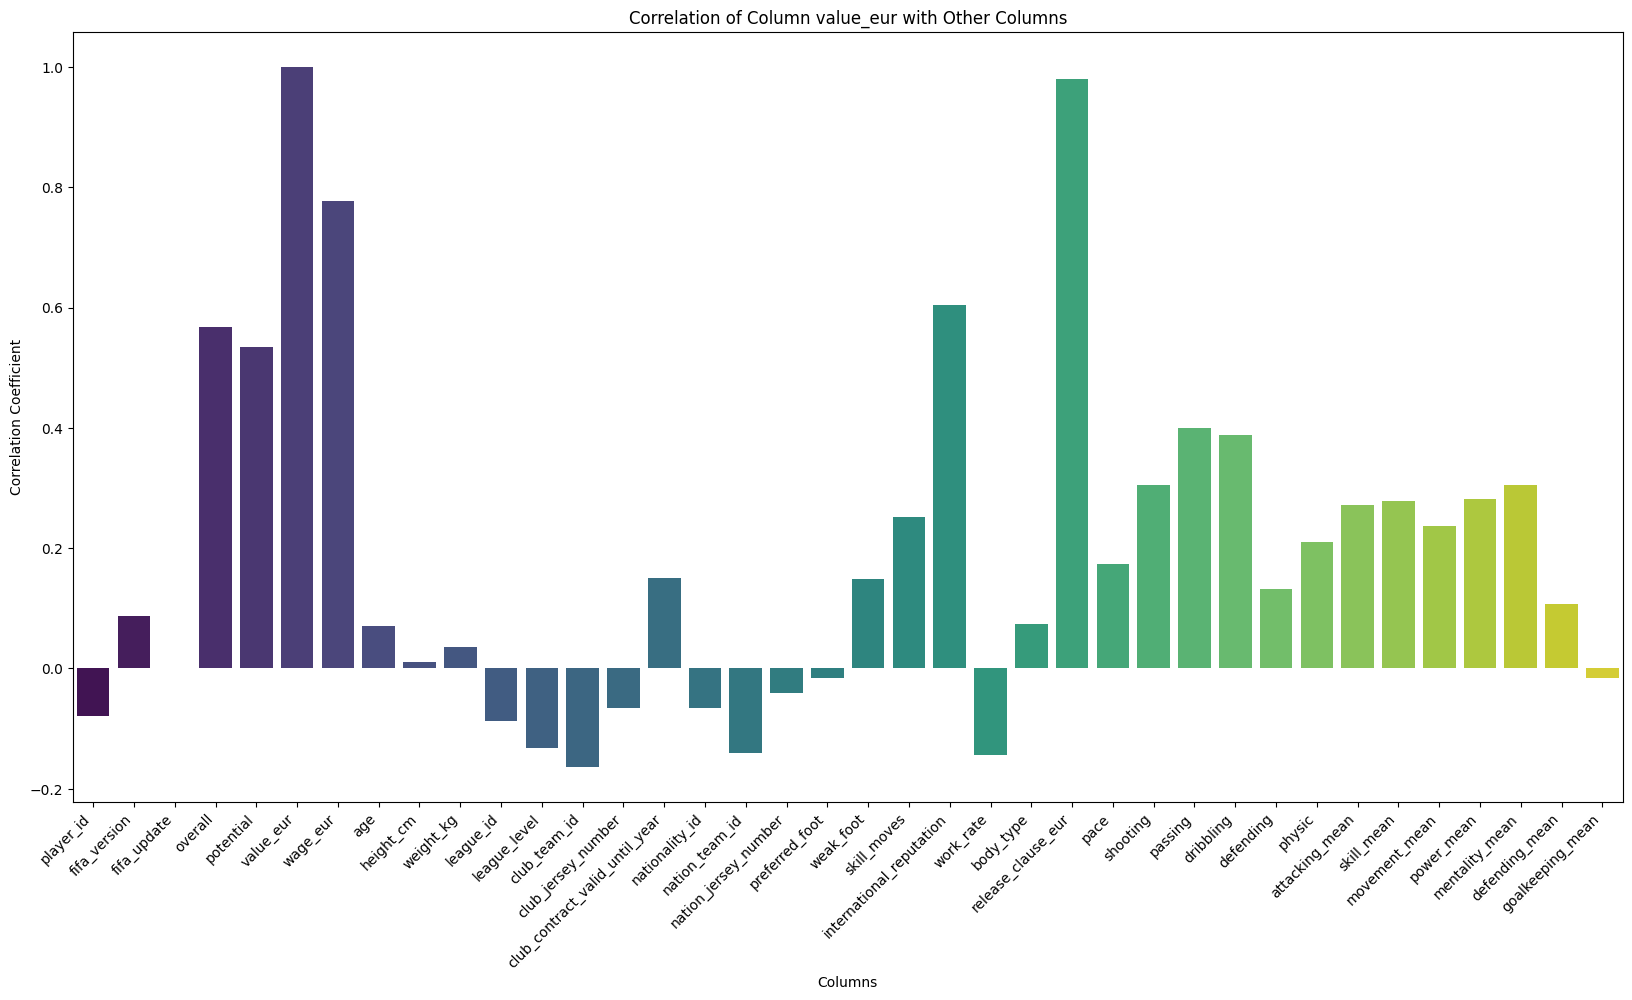

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_column = 'value_eur'

correlations= data.corrwith(data[selected_column])


plt.figure(figsize=(20, 10))
sns.barplot(x=correlations.index, y=correlations.values, palette='viridis')
plt.xticks(rotation=45, ha="right")

# Set plot labels and title
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient')
plt.title(f'Correlation of Column {selected_column} with Other Columns')

In [32]:
selected_column = 'value_eur'

correlations= data.corrwith(data[selected_column])
correlations

<ipython-input-32-0cfb865499dc>:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations= data.corrwith(data[selected_column])


player_id                        -0.079574
fifa_version                      0.087519
fifa_update                            NaN
overall                           0.566827
potential                         0.533870
value_eur                         1.000000
wage_eur                          0.777920
age                               0.069697
height_cm                         0.010578
weight_kg                         0.035788
league_id                        -0.087917
league_level                     -0.132629
club_team_id                     -0.163873
club_jersey_number               -0.066104
club_contract_valid_until_year    0.150621
nationality_id                   -0.065789
nation_team_id                   -0.140731
nation_jersey_number             -0.040286
preferred_foot                   -0.015197
weak_foot                         0.148026
skill_moves                       0.252316
international_reputation          0.604030
work_rate                        -0.144633
body_type  

In [33]:
correlations[correlations.abs()>0.1].index.to_list()

['overall',
 'potential',
 'value_eur',
 'wage_eur',
 'league_level',
 'club_team_id',
 'club_contract_valid_until_year',
 'nation_team_id',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'release_clause_eur',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_mean',
 'skill_mean',
 'movement_mean',
 'power_mean',
 'mentality_mean',
 'defending_mean']

In [35]:
# columns_to_keep = [
#                   'overall',
#                   'potential',
#                   'value_eur',
#                   'wage_eur',
#                   'age',
#                   'height_cm',
#                   'weight_kg',
#                   'league_id',
#                   'league_level',
#                   'club_contract_valid_until_year',
#                   'preferred_foot',
#                   'weak_foot',
#                   'skill_moves',
#                   'international_reputation',
#                   'work_rate',
#                   'body_type',
#                   'release_clause_eur',
#                   'pace',
#                   'shooting',
#                   'passing',
#                   'dribbling',
#                   'defending',
#                   'physic',
#                   'attacking_mean',
#                   'skill_mean',
#                   'movement_mean',
#                   'power_mean',
#                   'mentality_mean',
#                   'defending_mean',
#                   'goalkeeping_mean']
# columns_to_delete = list(set(data.columns.to_list()) - set(columns_to_keep))
# data = data.drop(columns=columns_to_delete)
# data.head()

In [36]:
columns_to_keep = correlations[correlations.abs()>0.1].index.to_list()
columns_to_delete = list(set(data.columns.to_list()) - set(columns_to_keep))
data = data.drop(columns=columns_to_delete)
data.head()

,overall,potential,value_eur,wage_eur,league_level,club_team_id,club_contract_valid_until_year,nation_team_id,weak_foot,skill_moves,...,passing,dribbling,defending,physic,attacking_mean,skill_mean,movement_mean,power_mean,mentality_mean,defending_mean
0,93,95,100500000.0,550000.0,1.0,241.0,2018.0,1369.0,3,4,...,86.0,96.0,27.0,63.0,84.6,89.4,93.8,75.6,65.6,22.000000
1,92,92,79000000.0,375000.0,1.0,243.0,2018.0,1354.0,4,5,...,81.0,91.0,32.0,79.0,86.6,84.8,86.2,89.8,68.8,25.333333
2,90,90,54500000.0,275000.0,1.0,21.0,2017.0,105035.0,2,4,...,83.0,92.0,32.0,64.0,77.4,85.4,91.8,76.0,67.8,27.000000
3,90,90,52500000.0,275000.0,1.0,73.0,2016.0,1363.0,4,4,...,81.0,86.0,34.0,86.0,83.8,82.8,72.6,84.8,72.8,31.000000
4,90,90,63500000.0,300000.0,1.0,21.0,2019.0,1337.0,4,1,...,NaN,NaN,NaN,NaN,28.4,29.4,57.2,54.4,28.2,25.000000


In [37]:
data.shape

(161583, 25)

In [38]:
data = data.dropna()

In [39]:
data.shape

(4135, 25)

In [40]:
data.dtypes

overall                             int64
potential                           int64
value_eur                         float64
wage_eur                          float64
league_level                      float64
club_team_id                      float64
club_contract_valid_until_year    float64
nation_team_id                    float64
weak_foot                           int64
skill_moves                         int64
international_reputation            int64
work_rate                           int64
release_clause_eur                float64
pace                              float64
shooting                          float64
passing                           float64
dribbling                         float64
defending                         float64
physic                            float64
attacking_mean                    float64
skill_mean                        float64
movement_mean                     float64
power_mean                        float64
mentality_mean                    

In [41]:
# data[['preferred_foot','work_rate', 'body_type']]

In [42]:
# data['preferred_foot'] = (data['preferred_foot'] == 'Left').astype(int)

In [43]:
# data = pd.get_dummies(data, columns=['work_rate', 'body_type'])

In [44]:
# data.dtypes

In [45]:
# data[data['player_id']==158023]

In [46]:
from sklearn.preprocessing import StandardScaler

columns = data.columns.to_list()

scaler = StandardScaler()
data[columns] = scaler.fit_transform(data[columns])

data.head()

,overall,potential,value_eur,wage_eur,league_level,club_team_id,club_contract_valid_until_year,nation_team_id,weak_foot,skill_moves,...,passing,dribbling,defending,physic,attacking_mean,skill_mean,movement_mean,power_mean,mentality_mean,defending_mean
50427,3.001967,2.453108,3.931358,8.824420,-0.309143,-0.501048,-0.471981,-0.512549,1.020877,2.720308,...,1.514501,1.940391,-1.512792,1.013922,2.646979,1.690650,1.569577,3.120579,1.388114,-1.688441
50428,2.836418,2.293803,4.397234,8.824420,-0.309143,-0.501095,-1.904205,-0.512210,1.020877,1.413106,...,1.930556,2.565738,-1.907818,-1.362746,2.164352,2.445806,2.265353,0.711670,0.733990,-1.840559
50430,2.670870,2.134497,4.004917,7.569992,-0.309143,-0.501095,-0.471981,-0.512029,1.020877,1.413106,...,1.202460,1.627717,-1.004902,1.139009,2.230165,1.558498,1.030911,1.855901,1.636230,-1.063069
50431,2.670870,2.453108,5.279945,3.806707,-0.309143,-0.505006,0.005426,-0.512187,2.403558,2.720308,...,1.202460,2.461513,-1.682089,-1.487833,1.593974,1.936076,2.063353,-0.011003,1.004662,-1.654637
50432,2.505322,1.975192,3.759720,5.061136,-0.309143,-0.506217,-0.471981,-0.512572,1.020877,0.105904,...,0.786405,1.523493,-1.230631,1.264097,1.988851,1.350830,1.188022,2.066681,1.478338,-1.519422


STEPS TO PERFORM

1. ~~REMOVE NA CELLS~~
2. ~~REMOVE REDUDANT COLUMNS~~
3. ~~DIVIDE THE COLUMNS IN X AND y~~
4. ~~train_test_split~~
5. TRAIN LINEAR REGRESSION MODEL
6. FIND OUT THE ACCURACY AND R2


Need to check whether removing the player id, fifa version and fifa update columns help improve the accuracy..

- before scaling

  - without removing:
    - Mean Squared Error: 1587133444056.8484
    - Root Mean Squared Error: 1259814.8451486228
    - R-squared: 0.9622695722399305

  - after removing:
    - Mean Squared Error: 1588167356410.5562
    - Root Mean Squared Error: 1260225.1213218041
    - R-squared: 0.9622449933644

- after scaling:
  - Mean Squared Error: 0.03307821645198476
  - Root Mean Squared Error: 0.1818741775293699
  - R-squared: 0.9622449933644271


In [47]:
y = data["value_eur"]
X = data.drop("value_eur", axis=1)

In [48]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def linearReg(X_train, X_test, y_train, y_test):
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  print(f'Mean Squared Error: {mse}')
  print(f'Root Mean Squared Error: {rmse}')
  print(f'R-squared: {r2}')


In [50]:
linearReg(X_train, X_test, y_train, y_test)

Mean Squared Error: 0.05385397457231837
Root Mean Squared Error: 0.23206459137989657
R-squared: 0.9463027197943716


In [51]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score


def sgdRegressor(X_train, X_test, y_train, y_test):
  model = SGDRegressor(max_iter=100)
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Calculate mean squared error for training and testing sets
  train_loss = mean_squared_error(y_train, y_train_pred)
  test_loss = mean_squared_error(y_test, y_test_pred)

  print(f"Training Loss: {train_loss}")
  print(f"Test Loss: {test_loss}")
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  print(f'Mean Squared Error: {mse}')
  print(f'Root Mean Squared Error: {rmse}')
  print(f'R-squared: {r2}')

In [52]:
sgdRegressor(X_train, X_test, y_train, y_test)

Training Loss: 0.05014408908214535
Test Loss: 0.05414452647010566
Mean Squared Error: 0.05414452647010566
Root Mean Squared Error: 0.23268976442917652
R-squared: 0.9460130132909303


In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

small_X = X
poly_features = PolynomialFeatures(degree=3, include_bias=False)\
                                            .fit_transform(small_X)

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)


In [56]:
linearReg(X_train, X_test, y_train, y_test)

Mean Squared Error: 39.29900872224095
Root Mean Squared Error: 6.26889214472868
R-squared: -38.18466371182755


In [57]:
sgdRegressor(X_train, X_test, y_train, y_test)

Training Loss: 2.3401803868770232e+26
Test Loss: 1.638803990733512e+26
Mean Squared Error: 1.638803990733512e+26
Root Mean Squared Error: 12801577991534.918
R-squared: -1.6340357010112343e+26
